In [1]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [2]:
total_class=6

In [3]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(total_class,activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [5]:
import tensorflow as tf

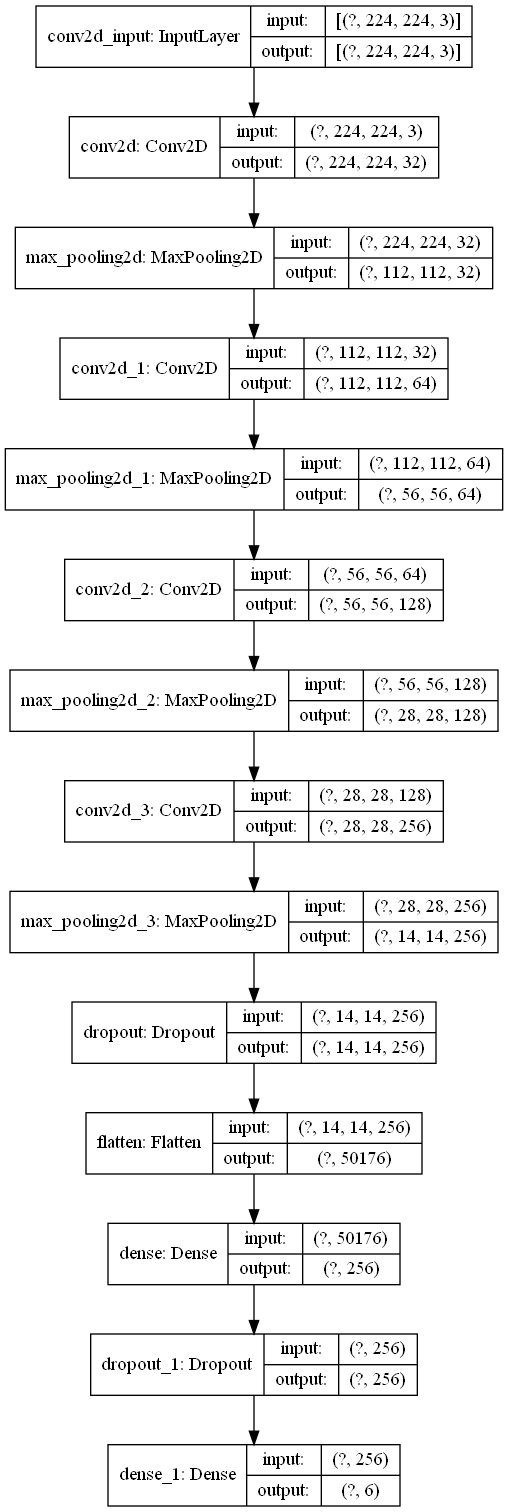

In [6]:
tf.keras.utils.plot_model(model,to_file='CNN_13072021.png',show_shapes=True)

## Visualize with Visual Keras

In [7]:
import visualkeras

In [9]:
visualkeras.layered_view(model).show()
visualkeras.layered_view(model,to_file='cnn_architecture.png')
visualkeras.layered_view(model,to_file='cnn_architecture.png').show()

## Legend

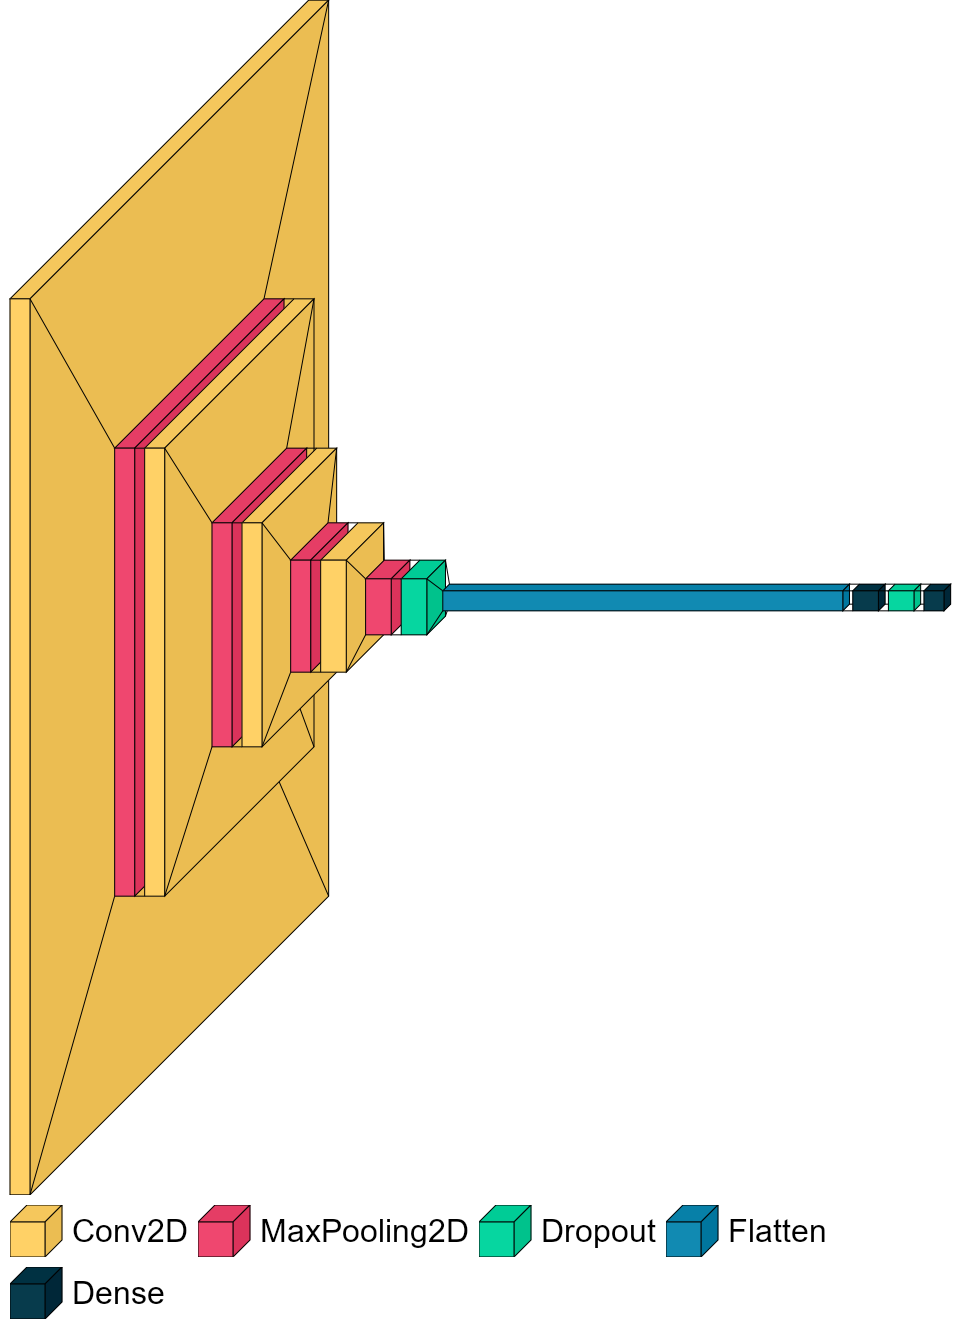

In [10]:
from PIL import ImageFont
font=ImageFont.truetype('arial.ttf',32)
visualkeras.layered_view(model,legend=True,font=font)

## Flat Style

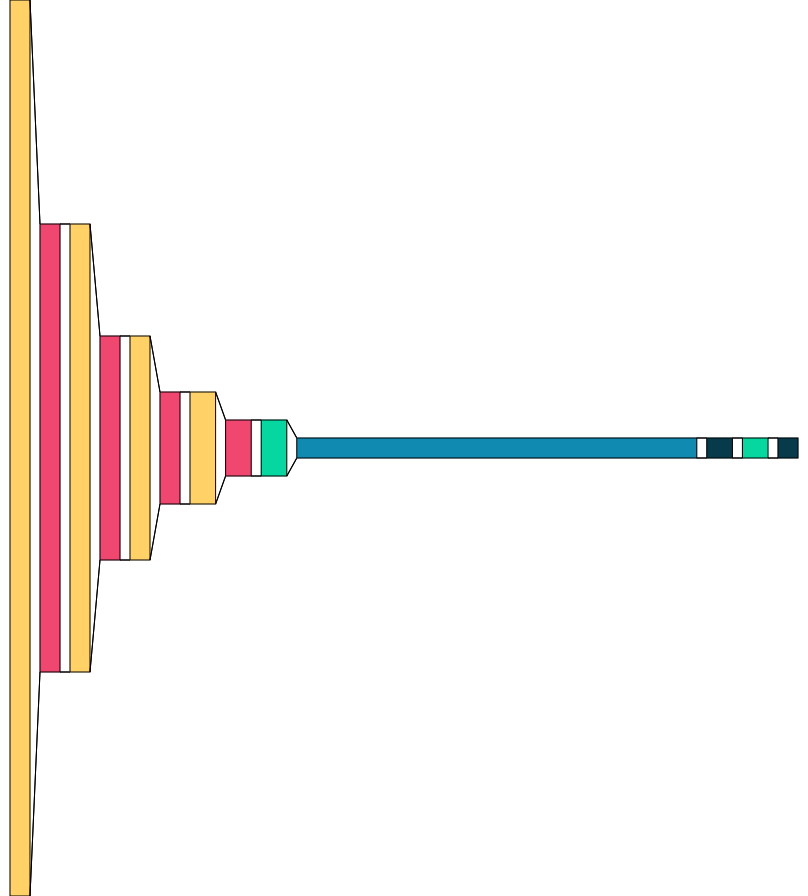

In [11]:
visualkeras.layered_view(model,
                         to_file='flat_cnn.png',
                         draw_volume=False)

## Spacing and logic grouping

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

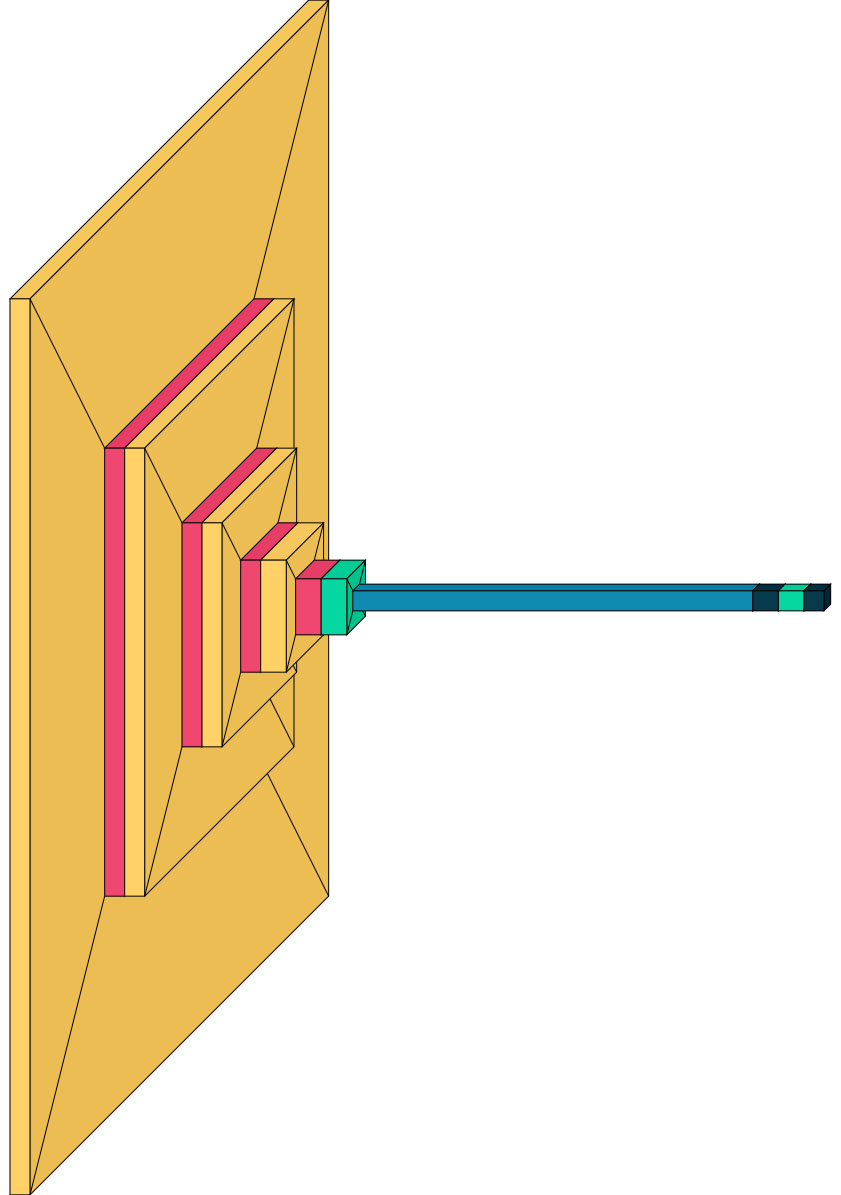

In [13]:
model.add(visualkeras.SpacingDummyLayer(spacing=100))
visualkeras.layered_view(model,spacing=0)

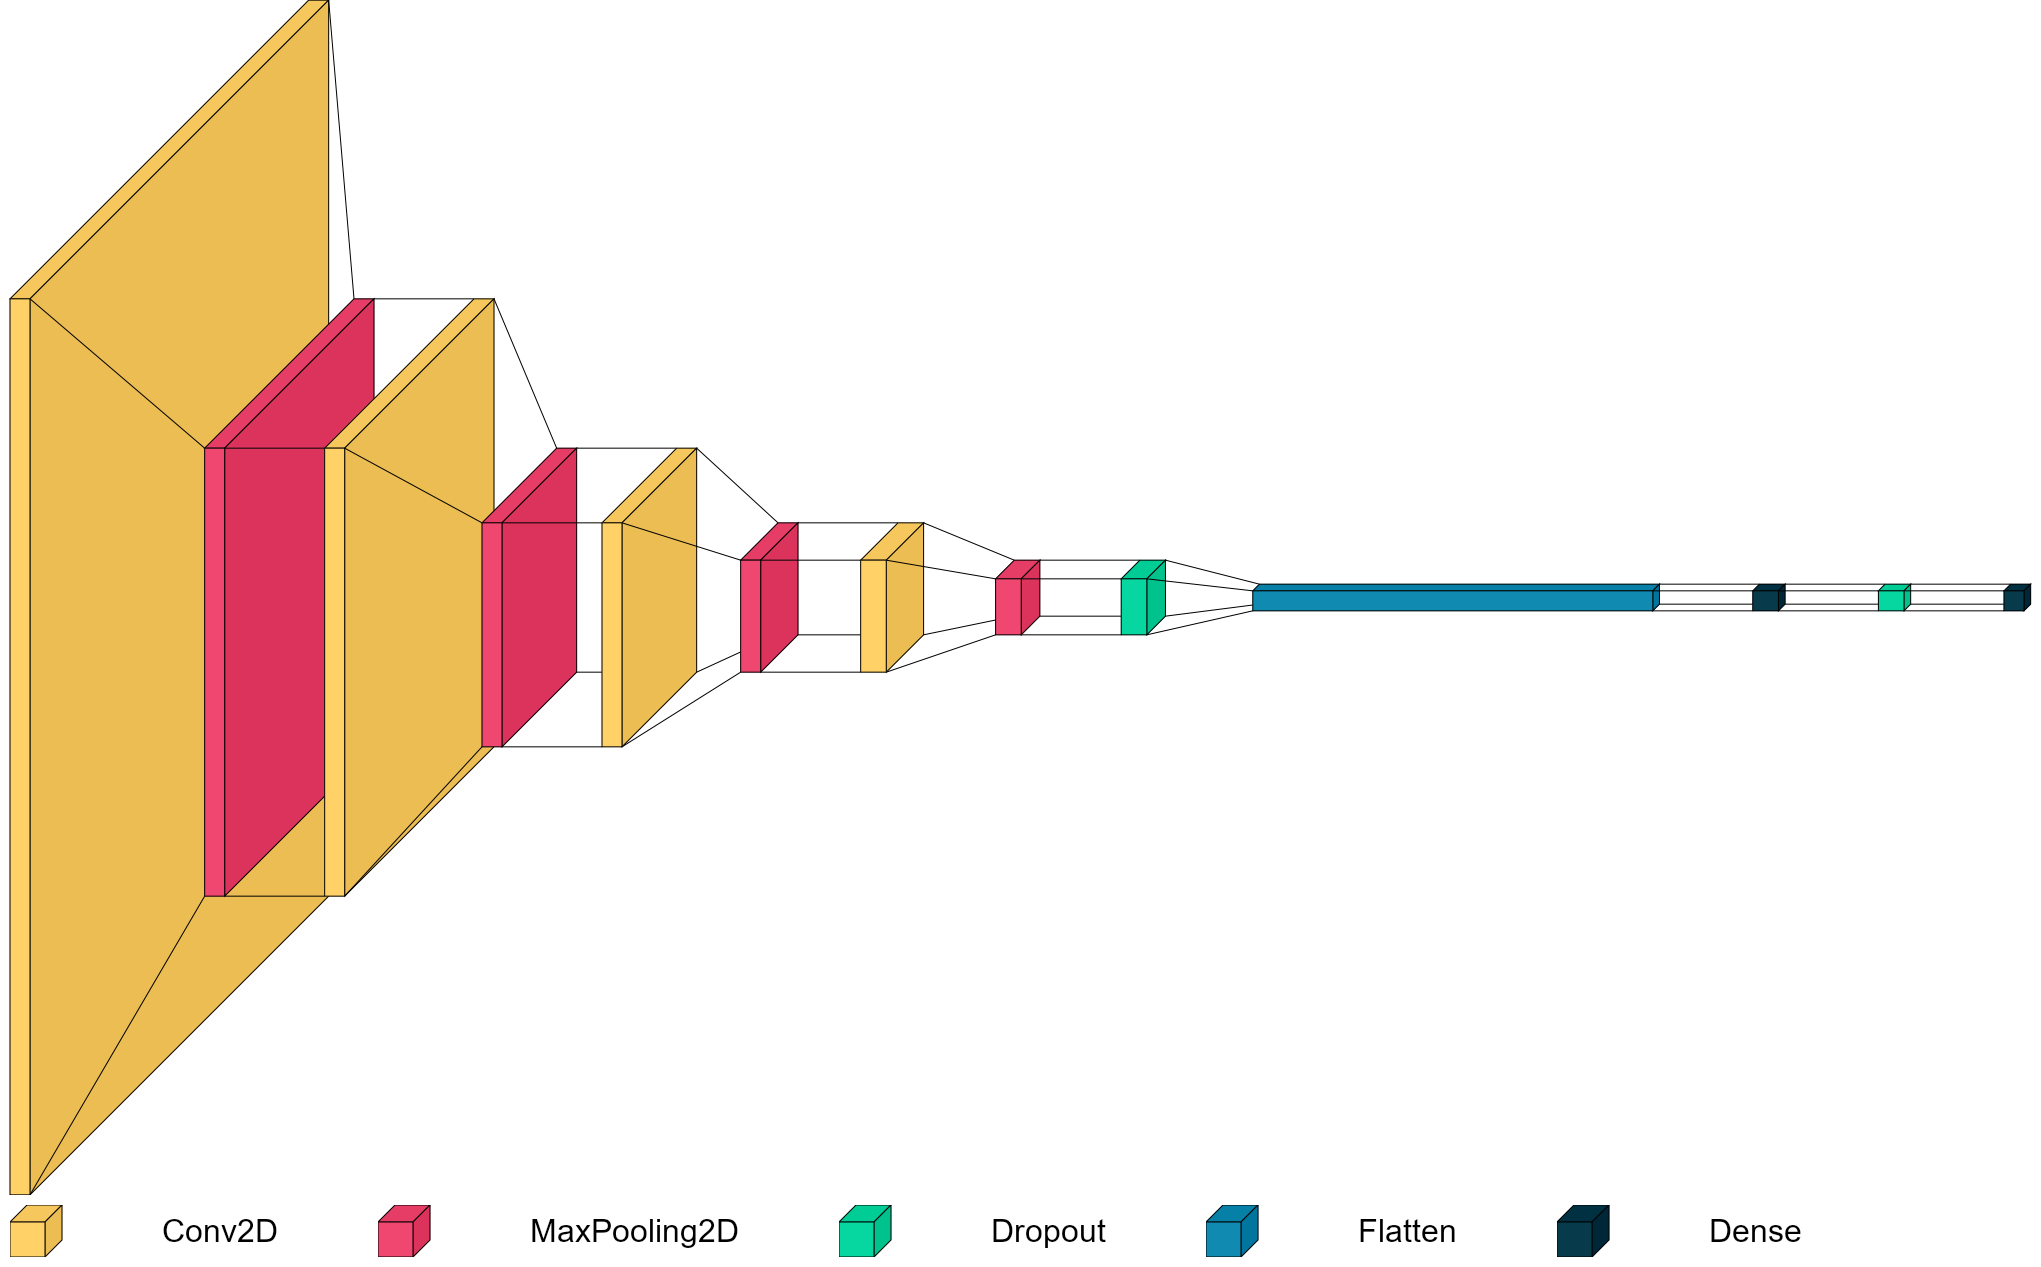

In [18]:
visualkeras.layered_view(model,spacing=100,legend=True,font=font)

## Custom Color Map
it is possible to provide a custom color map for fill and outline per layer type

In [19]:
from collections import defaultdict

In [20]:
color_map=defaultdict(dict)

In [21]:
color_map['Conv2D']['fill']='orange'
color_map['MaxPooling2D']['fill']='gray'
color_map['Dense']['fill']='green'
color_map['Dropout']['fill']='pink'
color_map['Flatten']['fill']='teal'

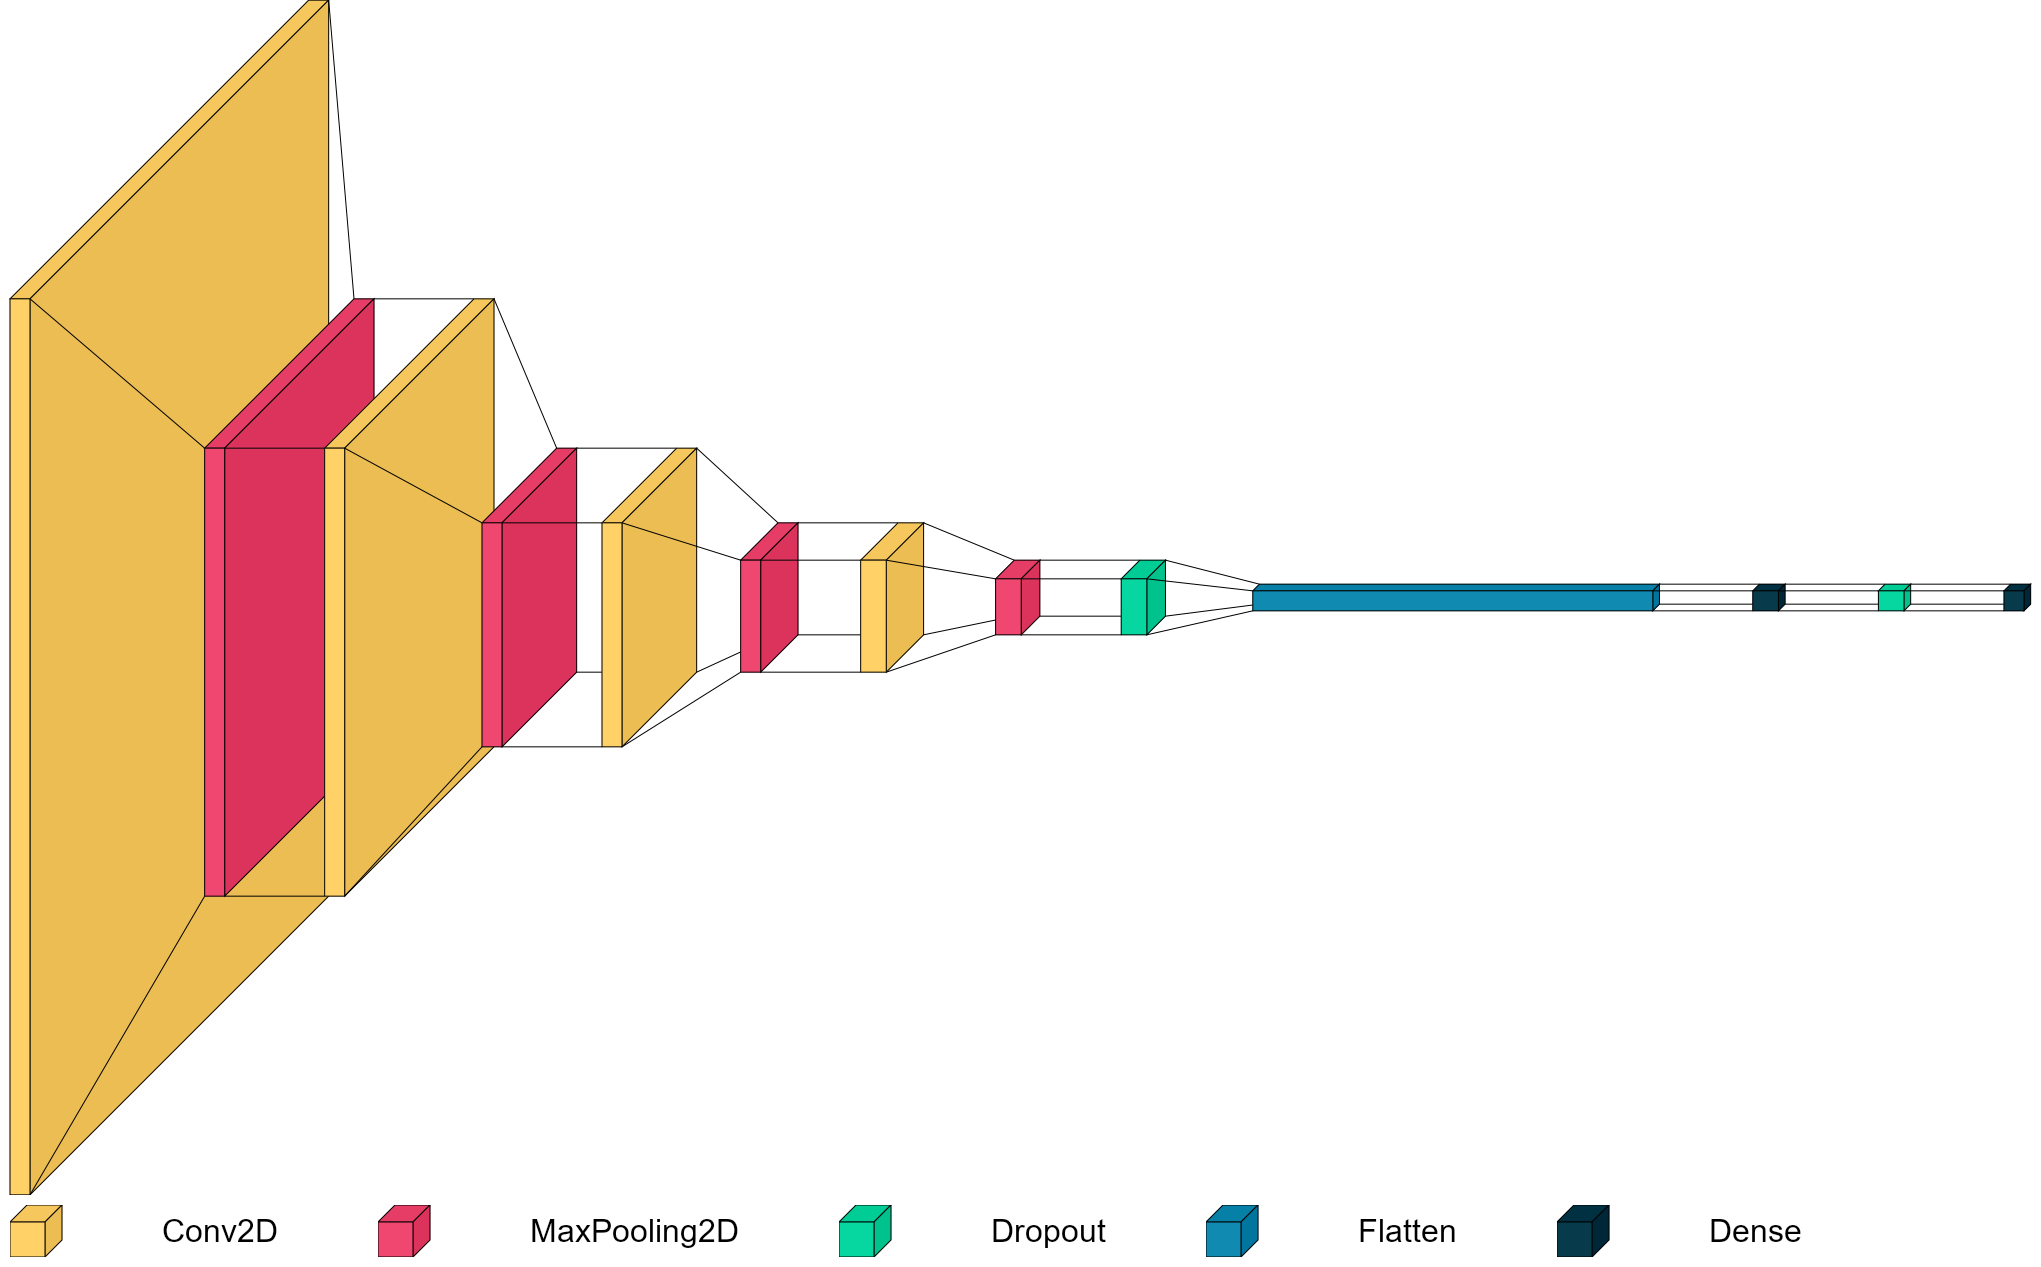

In [22]:
visualkeras.layered_view(model,color_map=color_map,spacing=100,legend=True,font=font)

## Scaling Dimension

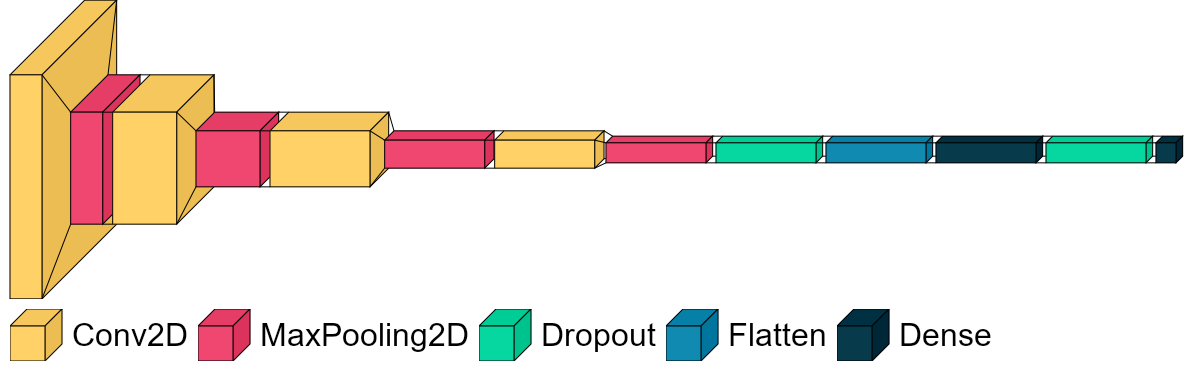

In [28]:
visualkeras.layered_view(model,
                         to_file='scaling_cnn.png',
                         scale_xy=1,
                         scale_z=1,
                         max_z=100,
                        spacing=10,
                         legend=True,
                         font=font
                        )